In [1]:
from Manuel_BayesPLQE_Functions import *
import numpy as np

In [2]:
Thickness = 600 #nm
laser = '450 nm'    #choose: '405 nm', '450 nm', '532 nm' or '660 nm'
save = 'no'


normalize = [True, True, True]    #or False
k_aug_guess = 1e-28

data_folder_nc = r"C:\Users\kober-czerny\OneDrive - Nexus365\00_Oxford_PhD\00_Snaith Group\Projects_Collection\MKC06_Bayes\5_Data Collection\TRPL\2023_07_20_Bayes_Seongrok_FAPI"
sample_names = ["Seo_FAPI_drawn_samples.dat","Seo_Spiro_drawn_samples.dat","Seo_SnO2_no_Reabs_drawn_samples.dat"]

PLQE_file_name = r"C:\Users\kober-czerny\OneDrive - Nexus365\00_Oxford_PhD\00_Snaith Group\Projects_Collection\MKC06_Bayes\5_Data Collection\PLQE\2023_07_20_Bayes_Seongrok_FAPI\Data2_processed\PLQEs_long.csv"
PLQE_sample_names = ["Seo_FAPI_1","Seo_FAPI_Spiro_1", "Seo_FAPI_TiO2_SnO2_1"]
PLQE_power_names = ["Power_Seo_FAPI_1(W)","Power_Seo_FAPI_Spiro_1(W)","Power_Seo_FAPI_TiO2_SnO2_1(W)"]

[1.0000395]
[1.00003948]
[1.00003945]
[1.00003942]
[1.00003937]
[1.00003931]
[1.00003922]
[1.0000391]
[1.00003897]
[1.00003881]
[1.00003863]
[1.00003844]
[1.00003824]
[1.00003804]
[1.24091573]
[1.24005317]
[1.23903965]
[1.23773357]
[1.23604547]
[1.23368936]
[1.23064951]
[1.22650691]
[1.22214318]
[1.21729042]
[1.21172149]
[1.20622701]
[1.20048024]
[1.19506747]
[1.00007375]
[1.00007374]
[1.00007373]
[1.00007371]
[1.00007369]
[1.00007365]
[1.00007361]
[1.00007354]
[1.00007347]
[1.00007339]
[1.0000733]
[1.0000732]
[1.00007309]
[1.00007298]
[2.56705917]
[2.5665337]
[2.56591615]
[2.56511644]
[2.56407347]
[2.56259732]
[2.56065456]
[2.55793322]
[2.5549691]
[2.551548]
[2.54744912]
[2.54321064]
[2.53855462]
[2.53394401]
[4.41513136]
[4.41404381]
[4.41277091]
[4.41112613]
[4.40898358]
[4.40595294]
[4.40196488]
[4.39637751]
[4.39028899]
[4.3832577]
[4.37482718]
[4.3661022]
[4.35650893]
[4.34700011]
[1.00004137]
[1.00004136]
[1.00004135]
[1.00004134]
[1.00004132]
[1.0000413]
[1.00004127]
[1.0000412

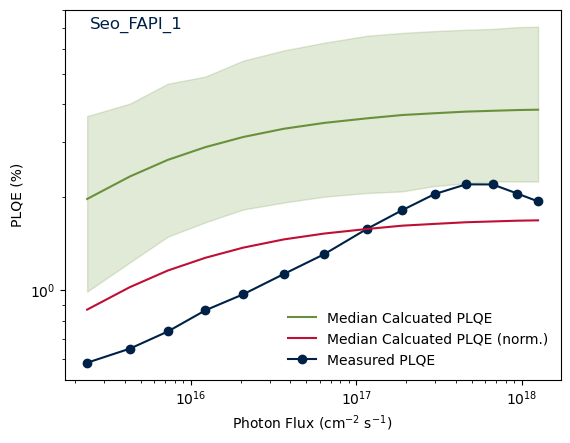

In [5]:
for i in np.arange(1)+0:#len(PLQE_sample_names)):
    simulate_PLQE(Thickness, laser, normalize[i], k_aug_guess, data_folder_nc, sample_names[i], PLQE_file_name,  PLQE_sample_names[i], save)

In [5]:
import pandas as pd
Raw_File = pd.read_csv(PLQE_file_name)
print(Raw_File)

    Power_Seo_FAPI_1(W)  PLQE_Seo_FAPI_1(%)  Abs_Seo_FAPI_1(-)  \
0              0.000013            0.584962           0.839201   
1              0.000022            0.649507           0.895851   
2              0.000037            0.737559           0.897483   
3              0.000063            0.863274           0.902986   
4              0.000107            0.972012           0.898833   
5              0.000188            1.129899           0.900533   
6              0.000329            1.309338           0.901183   
7              0.000594            1.578345           0.901690   
8              0.000972            1.815227           0.901913   
9              0.001526            2.045649           0.902658   
10             0.002357            2.198274           0.902904   
11             0.003415            2.197753           0.902371   
12             0.004810            2.054260           0.901914   
13             0.006430            1.937164           0.902390   

    Power

In [ ]:
kc_n = 1e6
kcp = 1e4
N_t = 1e17
ne_1 = 1e18*np.exp(-0.08/(8.6e-5*300))

n_dens = 1e12

p_dens_list = [1, 1e20]
f_t = 0

while np.abs(p_dens_list[-1] - p_dens_list[-2]) > 10:
    
    p_dens = n_dens + N_t*f_t 
    f_t = n_dens/(n_dens + kcp/kc_n*p_dens + ne_1)
    p_dens = n_dens + N_t*f_t 

    p_dens_list.append(p_dens)
    print(p_dens, f_t)


3221466722945.585 2.2214667229455847e-05
3221465626671.3135 2.2214656266713134e-05
3221465626671.8545 2.2214656266718544e-05


In [ ]:
n0 = ( 2 * ( (0.1*9.11e-31*1.38e-23*300) / (2*np.pi*(6.626e-34**2)) )**(3/2) )**2 * np.exp( -1.6 / (8.6e-5*300))*1e-6
print(np.log10(n0))

10.076576825476602
